In [50]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split

In [ ]:

df = pd.read_csv(r'"C:\Users\aayus\OneDrive\Desktop\ONE FOR ALL\class\ML\Datasets\Mall_Customers.csv"')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [45]:
df.shape

(200, 5)

In [46]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [47]:

# Rename 'Genre' to 'Gender' for consistency
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [49]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
# --- a) Data Preprocessing ---
# Encode Gender (Male=1, Female=0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [52]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [53]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# --- b) Data Preparation (Train-Test Split) ---
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (160, 2)
Test shape: (40, 2)


# --- c) Machine Learning Algorithms ---


In [55]:
# 1. K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_scaled)

In [56]:
# Add cluster labels to original DataFrame
df['KMeans_Cluster'] = kmeans_labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,2
2,3,0,20,16,6,1
3,4,0,23,16,77,2
4,5,0,31,17,40,1


In [57]:
# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

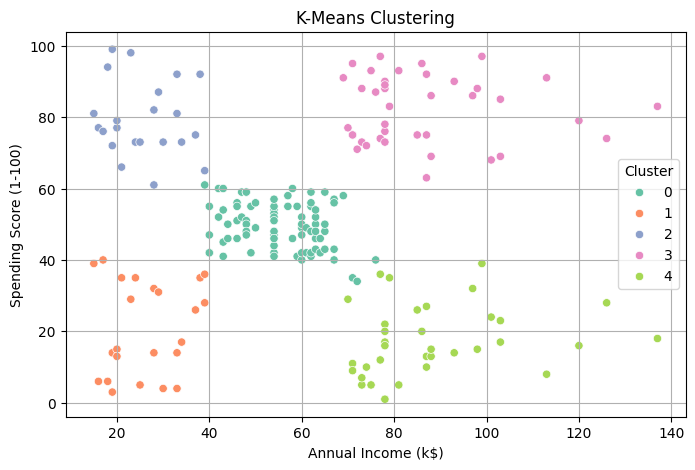

In [58]:
# KMeans Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='Set2')
plt.title("K-Means Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

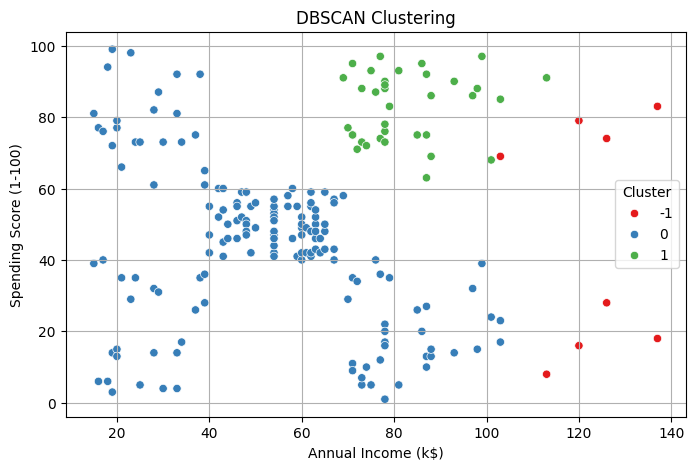

In [59]:
# DBSCAN Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='Set1')
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [60]:
# Optional: Check number of customers per cluster
print("\nKMeans Cluster Distribution:\n", df['KMeans_Cluster'].value_counts())
print("\nDBSCAN Cluster Distribution:\n", df['DBSCAN_Cluster'].value_counts())


KMeans Cluster Distribution:
 KMeans_Cluster
0    81
3    39
4    35
1    23
2    22
Name: count, dtype: int64

DBSCAN Cluster Distribution:
 DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64
